Topic Modeling

In [ ]:
!pip3 install beautifulsoup4 requests

In [ ]:
import requests
from bs4 import BeautifulSoup
url1="https://www.tradebulls.in/online-share-trading-basics/how-start-your-own-online-trading-business-atma-nirbhar-india"
url2="https://capex.com/en/academy/trading-online"
url3="https://www.bajajbroking.in/knowledge-center/what-is-online-trading"

In [ ]:
response=requests.get(url1)
response1=requests.get(url2)
response3=requests.get(url3)
soup1 = BeautifulSoup(response.content, "html.parser")
soup2 = BeautifulSoup(response1.content, "html.parser")
soup3 = BeautifulSoup(response3.content, "html.parser")

In [ ]:
para=soup1.find_all("p")
for p in para:
  print(p.get_text())
paras=soup2.find_all("p")
for p in paras:
  print(p.get_text())
ta=soup3.find_all("p")
for p in ta:
  print(p.get_text())

Tradebulls Securities is one of the most trusted Indian financial corporations aimed to make trading easier for everyone, even for those who are from a non-trading background. Being in the market for over 15 years, Tradebulls has earned its huge clientele of 2 Lakh+ clients, 2750+ business partners till date. Starting from a small firm with the overwhelming responses and trust from our customers, today we have expanded our operations to 18+ branches in the top cities of India including Mumbai, Bengaluru, Delhi, Ahmedabad, Kolkata, Gandhinagar, Surat, Rajkot, Vadodara. If you are new in the ‘trading business’, you should definitely know about the unique products that we offer to our customers like ‘Target’; to analyse future profit prospects, ‘Portfolio Optimizer’; to select the best portfolio depending upon the required outcome, ‘Investmentz Buckets’; to determine the sensitivity of a portfolio, ‘DIY Screeners’; program to filter stocks as per customer’s requirements. Also, other infor

In [ ]:
import pandas as pd
text1=[p.text for p in para]
text2=[p.text for p in paras]
text3=[p.text for p in ta]
df2=pd.DataFrame({"text" :text1})
df1=pd.DataFrame({"text" :text2})
df3=pd.DataFrame({"text" :text3})

In [ ]:
df = pd.concat([df1, df2,df3], ignore_index=True)
print(df)


                                                  text
0    According to legend, Joseph Kennedy sold all t...
1    What made Kennedy sell? According to the story...
2    Now, plenty of “common” people at least know w...
3    Almost anything can be traded online: stocks, ...
4    And, you do not have to work on Wall Street to...
..                                                 ...
263  Screeners is not Exchange-approved products an...
264  Securities quoted are exemplary and not recomm...
265  Account would be open after all procedure rela...
266  The images used are only for representation pu...
267  As per SEBI circular no. SEBI/HO/MIRSD/MIRSD-P...

[268 rows x 1 columns]


In [ ]:
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df['text'] = df['text'].str.lower()
df.head()

,text
0,according to legend joseph kennedy sold all th...
1,what made kennedy sell according to the story ...
2,now plenty of common people at least know what...
3,almost anything can be traded online stocks cu...
4,and you do not have to work on wall street to ...


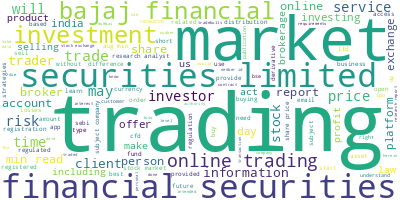

In [ ]:
from wordcloud import WordCloud
long_string = ','.join(list(df['text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

df = pd.concat([df1, df2, df3], ignore_index=True)
df['text_tokens']= df['text'].apply(word_tokenize)
direct=df['text_tokens']
df = df['text_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [According, legend, ,, Joseph, Kennedy, sold, ...
1    [What, made, Kennedy, sell, ?, According, stor...
2    [Now, ,, plenty, “, common, ”, people, least, ...
3    [Almost, anything, traded, online, :, stocks, ...
4    [And, ,, work, Wall, Street, online, trading, ...
Name: text_tokens, dtype: object


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(direct)
# Create Corpus
texts = df
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 3), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (12, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (21, 1), (22, 1), (23, 1), (24, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (35, 1), (36, 1)]


In [ ]:
import matplotlib.pyplot as plt
from gensim import models, corpora
from gensim.models import CoherenceModel

In [ ]:
def calculate_coherence_score(corpus, id2word , k, texts):
    lda_model = models.LdaModel(corpus, num_topics=k, id2word=id2word)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word , coherence='c_v')
    return coherence_model_lda.get_coherence()

In [ ]:
print("Coherence Score:", calculate_coherence_score(corpus, id2word, 5, direct))

Coherence Score: 0.30089425246001855


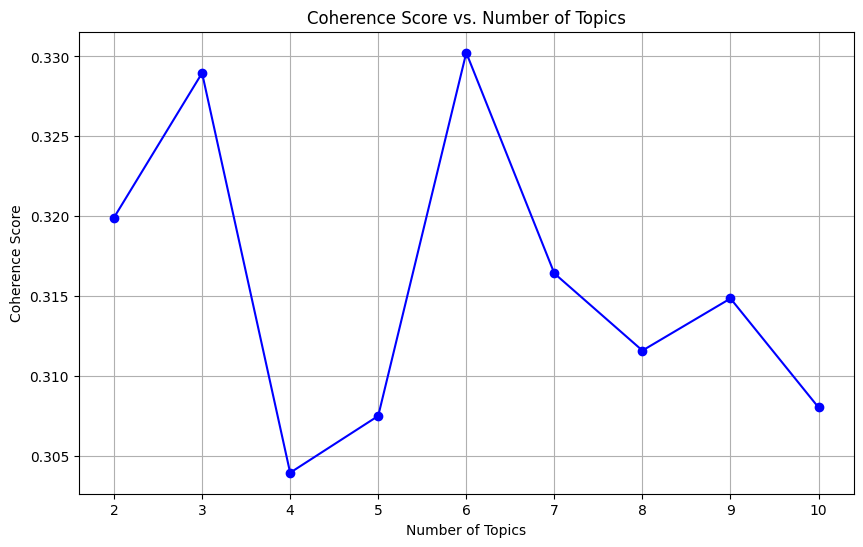

In [ ]:
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics + 1, step_size)
coherence_scores = []
for k in topics_range:
    lda_model = models.LdaModel(corpus, num_topics=k, id2word=id2word, passes=10,iterations=100)
    score = calculate_coherence_score(corpus, id2word, k, direct)
    coherence_scores.append(score)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(topics_range)
plt.grid(True)
plt.show()

In [ ]:
from pprint import pprint
import gensim
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.053*"," + 0.050*"." + 0.020*"trading" + 0.013*")" + 0.012*":" + 0.012*"(" '
  '+ 0.008*"market" + 0.007*"online" + 0.007*"Financial" + 0.007*"Securities"'),
 (1,
  '0.046*"." + 0.043*"," + 0.018*"trading" + 0.012*"online" + 0.010*"Limited" '
  '+ 0.010*"Bajaj" + 0.009*"Securities" + 0.009*"Financial" + 0.007*"(" + '
  '0.007*")"'),
 (2,
  '0.074*"," + 0.038*"." + 0.013*"trading" + 0.012*"|" + 0.010*":" + 0.006*"(" '
  '+ 0.006*"&" + 0.006*")" + 0.005*"read" + 0.005*"No"'),
 (3,
  '0.045*"," + 0.035*"." + 0.025*"trading" + 0.010*":" + 0.008*"|" + 0.007*"’" '
  '+ 0.006*"Financial" + 0.005*"Bajaj" + 0.005*"(" + 0.005*"Securities"'),
 (4,
  '0.047*"." + 0.035*"," + 0.012*"trading" + 0.011*"Limited" + '
  '0.010*"Securities" + 0.010*"Financial" + 0.010*"Bajaj" + 0.008*"investment" '
  '+ 0.006*":" + 0.005*"may"')]
